<a href="https://colab.research.google.com/github/zhoujiuzhou9/tensorFlow/blob/main/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
a = np.arange(5)
print(a)
print(a <= 3)

[0 1 2 3 4]
[ True  True  True  True False]


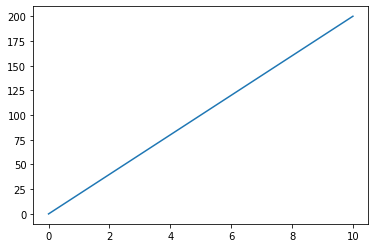

In [2]:
x_points=np.array([0,10])
y_points=np.array([0,200])

plt.plot(x_points,y_points)

In [ ]:
import tensorflow as tf

# '/test_file_1.txt' 内容为两行：1,2,3 和 4，5，6
# tf.train.string_input_producer 创建文件名称队列，返回队列对象，并自动创建了 QueueRunner
filename_queue = tf.train.string_input_producer(['test_file_1.txt'])

# 创建 tf.TextLineReader() 对象
reader = tf.TextLineReader()
# read函数将Queue作为输入， 输出为key和value，key为文件名， value为文件中的某一行
key, value = reader.read(filename_queue)

# 将读出来的每行数据，用逗号分隔开，并组成一个list
value_arr = tf.string_split([value], ',')
# 文件中读出来的数据是string格式，所以要转换成number格式
value_arr = tf.string_to_number(value_arr.values, out_type=tf.int64)

with tf.Session() as sess:
	# 生成线程管理对象
    coord = tf.train.Coordinator()

    # 启动计算图中所有的队列线程
    threads = tf.train.start_queue_runners(coord=coord)

    for i in range(6):
        features = sess.run(value_arr)
        print(features)
        
    coord.request_stop()
    coord.join(threads)

# 输出为：
# [1 2 3]
# [4 5 6]
# [1 2 3]
# [4 5 6]
# [1 2 3]
# [4 5 6]




In [ ]:
import tensorflow as tf

# '/test_file_1.txt' 内容为两行：1,2,3 和 4，5，6
# '/test_file_2.txt' 内容为两行：7,8,9 和 10，11，12
file_ist = ['/test_file_1.txt', '/test_file_2.txt']

# string_input_producer 会产生一个文件名队列
filename_queue = tf.train.string_input_producer(file_ist, shuffle=False, num_epochs=2)

# reader从文件名队列中读数据, 对应的方法是reader.read()
reader = tf.WholeFileReader()
key_tf, value_tf = reader.read(filename_queue)

with tf.Session() as sess:
	coord = tf.train.Coordinator()

	# tf.train.string_input_producer定义了一个epoch变量，要对它进行初始化
    sess.run(tf.local_variables_initializer())
    
	# start_queue_runners启动线程之后，才会开始填充队列
    tf.train.start_queue_runners(sess=sess)

    for i in range(4):
        key, value = sess.run([key_tf, value_tf])
        print('\n', 'key:', key)
        print('value:', value)
        print('value.decode(): \n', value.decode())
        
    coord.request_stop()
    coord.join(threads)

# 输出为：
#  key: b'/Users/manmi/Documents/GitHub/tensorflow/test_file_1.txt'
# value: b'1,2,3\n4,5,6'
# value.decode(): 
#  1,2,3
# 4,5,6
# 
#  key: b'/Users/manmi/Documents/GitHub/tensorflow/test_file_2.txt'
# value: b'7,8,9\n10,11,12'
# value.decode(): 
#  7,8,9
# 10,11,12
# 
#  key: b'/Users/manmi/Documents/GitHub/tensorflow/test_file_1.txt'
# value: b'1,2,3\n4,5,6'
# value.decode(): 
#  1,2,3
# 4,5,6
# 
#  key: b'/Users/manmi/Documents/GitHub/tensorflow/test_file_2.txt'
# value: b'7,8,9\n10,11,12'
# value.decode(): 
#  7,8,9
# 10,11,12

